In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_pickle('../data/train_merged.pkl')

In [23]:
train.shape

(590540, 435)

In [21]:
train.head()

/accounts/masters/quannm/fraud-detection-gnn/venv/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/accounts/masters/quannm/fraud-detection-gnn/venv/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Day
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000012
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000799
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001146
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,1.001227


In [3]:
train.describe()

/accounts/masters/quannm/fraud-detection-gnn/venv/lib/python3.13/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/accounts/masters/quannm/fraud-detection-gnn/venv/lib/python3.13/site-packages/numpy/_core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/accounts/masters/quannm/fraud-detection-gnn/venv/lib/python3.13/site-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/accounts/masters/quannm/fraud-detection-gnn/venv/lib/python3.13/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/accounts/masters/quannm/fraud-detection-gnn/venv/lib/python3.13/site-packages/numpy/_core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, wh

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.0,588975.0,586281.0,524834.0,524834.0,...,139369.0,4.511300e+04,139318.0,139261.0,5159.00,5169.000000,4747.000000,5132.0000,5163.00000,77586.0
mean,3.282270e+06,0.034990,7.372311e+06,NaN,9898.734658,NaN,NaN,NaN,NaN,NaN,...,NaN,inf,NaN,NaN,inf,inf,12.796875,inf,inf,NaN
std,1.704744e+05,0.183755,4.617224e+06,0.000000,4901.170153,0.0,0.0,0.0,0.0,0.0,...,0.0,1.561523e+00,0.0,0.0,198.75,6.898438,2.371094,97.4375,32.09375,0.0
min,2.987000e+06,0.000000,8.640000e+04,0.250977,1000.000000,100.0,100.0,100.0,100.0,10.0,...,100.0,1.000000e+01,100.0,100.0,100.00,10.000000,11.000000,100.0000,100.00000,0.0
25%,3.134635e+06,0.000000,3.027058e+06,43.312500,6019.000000,214.0,150.0,166.0,204.0,87.0,...,166.0,1.300000e+01,266.0,256.0,252.00,14.000000,11.000000,321.0000,119.00000,24.0
50%,3.282270e+06,0.000000,7.306528e+06,68.750000,9678.000000,361.0,150.0,226.0,299.0,87.0,...,166.0,1.500000e+01,341.0,472.0,252.00,14.000000,11.000000,321.0000,149.00000,24.0
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.0,150.0,226.0,330.0,87.0,...,225.0,1.500000e+01,427.0,533.0,486.50,14.000000,15.000000,371.0000,169.00000,32.0
max,3.577539e+06,1.000000,1.581113e+07,31936.000000,18396.000000,600.0,231.0,237.0,540.0,102.0,...,229.0,2.900000e+01,671.0,661.0,854.00,44.000000,26.000000,548.0000,216.00000,32.0


In [11]:
train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

Fraud Rate: 3.4990%
Total Fraud Cases: 20663


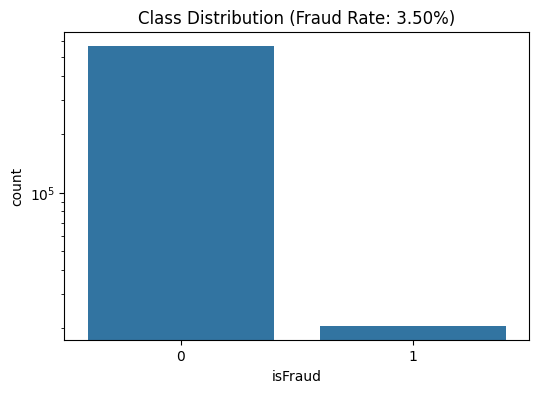

In [25]:
fraud_count = train['isFraud'].sum()
total_count = len(train)
fraud_rate = fraud_count / total_count


print(f"Fraud Rate: {fraud_rate:.4%}")
print(f"Total Fraud Cases: {fraud_count}")

plt.figure(figsize=(6, 4))

sns.countplot(x='isFraud', data=train)
plt.title(f'Class Distribution (Fraud Rate: {fraud_rate:.2%})')
plt.yscale('log')
plt.show()

Time Span: 182.0 days


(0.0, 182.99920138888888)

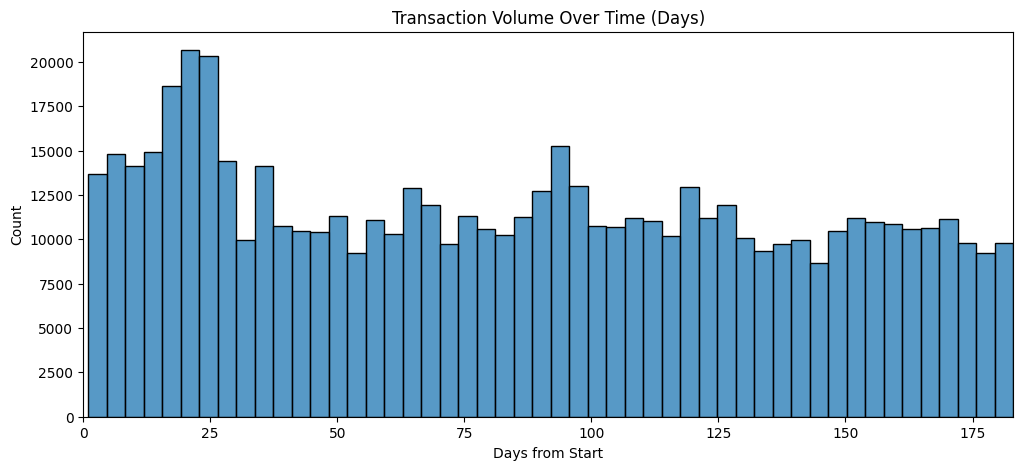

In [17]:
train['Day'] = train['TransactionDT'] / (24 * 60 * 60)
time_span = train['Day'].max() - train['Day'].min()

print(f"Time Span: {time_span:.1f} days")

plt.figure(figsize=(12, 5))
sns.histplot(train['Day'], bins=50, kde=False)
plt.title('Transaction Volume Over Time (Days)')
plt.xlabel('Days from Start')
plt.xlim(0, train['Day'].max())

In [19]:
key_cols = ['TransactionAmt', 'card1', 'dist1', 'P_emaildomain', 'DeviceInfo', 'id_01']
missing_props = train[key_cols].isnull().mean()

print(missing_props.sort_values(ascending=False))

DeviceInfo        0.799055
id_01             0.755761
dist1             0.596524
P_emaildomain     0.159949
TransactionAmt    0.000000
card1             0.000000
dtype: float64


In [20]:
cat_cols = ['card1', 'P_emaildomain', 'DeviceInfo', 'id_30', 'id_31']
for c in cat_cols:
    if c in train.columns:
        print(f"{c}: {train[c].nunique()} unique values")

card1: 13553 unique values
P_emaildomain: 59 unique values
DeviceInfo: 1786 unique values
id_30: 75 unique values
id_31: 130 unique values


In [26]:
train = train.sort_values('TransactionDT')
split_idx = int(len(train) * 0.8)

train_df = train.iloc[:split_idx]
val_df = train.iloc[split_idx:]

print(f"Time Split Cutoff: Index {split_idx}")
print(f"Training Data:   {train_df.shape[0]} rows")
print(f"Validation Data: {val_df.shape[0]} rows")

target = 'isFraud'
drop_cols = [target, 'TransactionDT', 'TransactionID']

X_train = train_df.drop(columns=drop_cols, errors='ignore')
y_train = train_df[target]

X_val = val_df.drop(columns=drop_cols, errors='ignore')
y_val = val_df[target]

print("-" * 30)
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print("-" * 30)

Time Split Cutoff: Index 472432
Training Data:   472432 rows
Validation Data: 118108 rows
------------------------------
X_train Shape: (472432, 432)
y_train Shape: (472432,)
------------------------------


In [28]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

clf = xgb.XGBClassifier(
    n_estimators=500,        # Number of trees (more = better but slower)
    max_depth=9,             # How deep each tree grows
    learning_rate=0.05,      # Step size
    subsample=0.9,           # Fraction of data to use per tree (prevents overfitting)
    colsample_bytree=0.9,    # Fraction of features to use per tree
    missing=-999,            # How to handle missing values (XGBoost handles NaNs automatically, but explicit is safe)
    random_state=2024,
    tree_method='hist', 
    early_stopping_rounds=50
    )

print("Preparing data for XGBoost...")

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype('category').cat.codes
        X_val[col] = X_val[col].astype('category').cat.codes

print("Training XGBoost Baseline...")
clf.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=50,              # Print progress every 50 trees
)

print("-" * 30)
print("Evaluating...")
preds = clf.predict_proba(X_val)[:, 1] # Get probabilities, not just 0/1
score = roc_auc_score(y_val, preds)
print(f"BASELINE AUC SCORE: {score:.4f}")
print("-" * 30)

Preparing data for XGBoost...
Training XGBoost Baseline...
[0]	validation_0-logloss:0.13839	validation_1-logloss:0.13800
[50]	validation_0-logloss:0.07053	validation_1-logloss:0.09771
[100]	validation_0-logloss:0.05936	validation_1-logloss:0.09402
[150]	validation_0-logloss:0.05398	validation_1-logloss:0.09191
[200]	validation_0-logloss:0.04902	validation_1-logloss:0.09030
[250]	validation_0-logloss:0.04517	validation_1-logloss:0.08891
[300]	validation_0-logloss:0.04201	validation_1-logloss:0.08831
[350]	validation_0-logloss:0.03947	validation_1-logloss:0.08784
[400]	validation_0-logloss:0.03709	validation_1-logloss:0.08724
[450]	validation_0-logloss:0.03447	validation_1-logloss:0.08686
[499]	validation_0-logloss:0.03237	validation_1-logloss:0.08669
------------------------------
Evaluating...
BASELINE AUC SCORE: 0.9144
------------------------------


Plotting Feature Importance...


<Figure size 1200x1000 with 0 Axes>

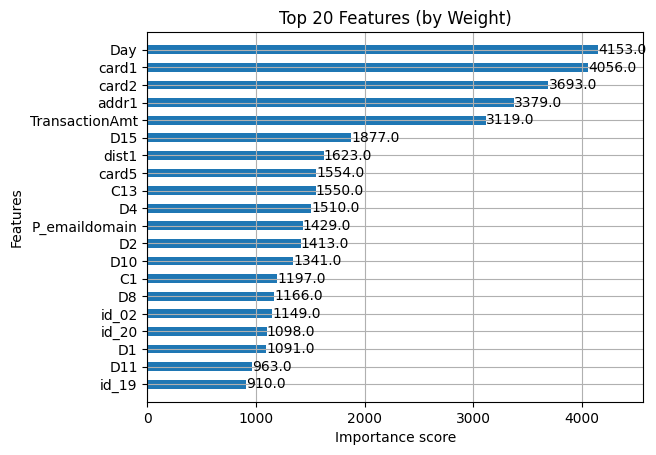

<Figure size 1200x1000 with 0 Axes>

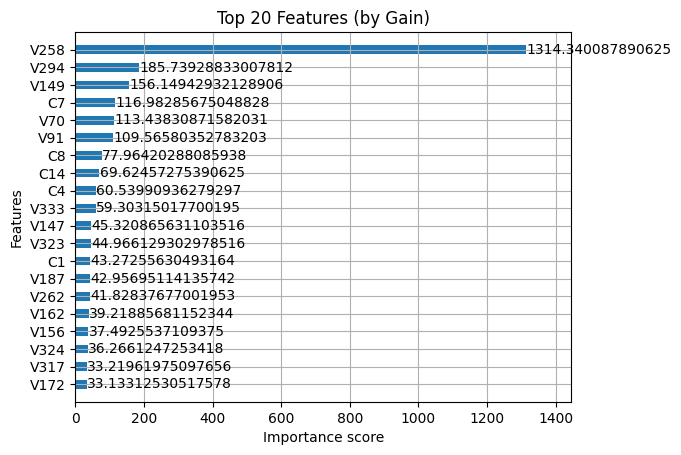

In [29]:
import matplotlib.pyplot as plt

# Get feature importance
# 'weight' = Number of times a feature appears in a tree
# 'gain' = Average gain of splits which use the feature (usually better)

print("Plotting Feature Importance...")

plt.figure(figsize=(12, 10))
xgb.plot_importance(clf, max_num_features=20, importance_type='weight', height=0.5)
plt.title('Top 20 Features (by Weight)')
plt.show()

plt.figure(figsize=(12, 10))
xgb.plot_importance(clf, max_num_features=20, importance_type='gain', height=0.5)
plt.title('Top 20 Features (by Gain)')
plt.show()